# 1 Importing Libraries and Datasets

In [1]:
#libraries
import pandas as pd
import numpy as np
import os

In [2]:
#dataset
df=pd.read_pickle(r"C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Data 02\Manipulated Data\projset_customers.pkl")

# 2 Analyst considerations

In [3]:
#viewing dataset columns
df.columns

Index([                      'order_id',                        'user_id',
                             'eval_set',                   'order_number',
                            'order_dow',              'order_hour_of_day',
               'days_since_prior_order',                     'product_id',
                    'add_to_cart_order',                      'reordered',
                               '_merge',                     'Unnamed: 0',
                         'product_name',                       'aisle_id',
                        'department_id',                         'prices',
                      'price_range_loc',                    'busiest_day',
       ('busiest_days', 'slowest_days'),                'popularity_days',
                      'popularity_hour',                      'max_order',
                         'loyalty_flag',                   'spender_type',
                        'spending_flag',             'ordering_frequency',
                       'f

In [ ]:
#viewing dataset columns
df.head(1)

#1 PII data in the dataframe would include Customer Name, State, Family Status, Gender, Age, Children, and Income. These columns as a whole can identify customers, in order to make it harder to identify customers, we would not need information such as customer name for our analysis, this is a column that could be deleted as User ID acts as an identifier that does not risk customer's being easily identifiable.

In [3]:
#removing first and last name column for safety concerns
df=df.drop(columns=['First Name','Last Name'])

In [ ]:
#confirming columns were removed
df.columns

# 3 Task Steps

#creating data dictionary
data = {
    'States':['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Conneticut','New York','Pennsylvania','New Jersey','Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri','Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana','Idaho','Monatana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'],
    'Region':['Northeast','Northeast','Northeast','Northeast','Northeast','Northeast','Northeast','Northeast','Northeast','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','Midwest','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','West','West','West','West','West','West','West','West','Pacific','Pacific','Pacific','Pacific','Pacific'],
}

#calling data dictionary to view
df1=pd.DataFrame(data)
df1

#creating definition for region column
def region_label(row):
    if row ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Conneticut','New York','Pennsylvania','New Jersey'] == 1:
        return 'Northeast'
    if row ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'] == 1:
        return 'Midwest'
    if row ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'] == 1:
        return 'South'
    if row ['Idaho','Monatana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico'] == 1:
        return 'West'
    if row ['Alaska','Washington','Oregon','California','Hawaii'] == 1:
        return 'Pacific'

In [4]:
#creating definitions for region column ALTERNATIVE due to error with data dictionary
region_label = {
    'Maine' : 'Northeast',
    'New Hampshire' : 'Northeast',
    'Vermont' : 'Northeast',
    'Massachusetts' : 'Northeast',
    'Rhode Island' : 'Northeast',
    'Connecticut' : 'Northeast',
    'New York' : 'Northeast',
    'Pennsylvania' : 'Northeast',
    'New Jersey' : 'Northeast',
        'Wisconsin' : 'Midwest',
        'Michigan' : 'Midwest',
        'Illinois' : 'Midwest',
        'Indiana' : 'Midwest',
        'Ohio' : 'Midwest',
        'North Dakota' : 'Midwest',
        'South Dakota' : 'Midwest',
        'Nebraska' : 'Midwest',
        'Kansas' : 'Midwest', 
        'Minnesota' : 'Midwest', 
        'Iowa' : 'Midwest',
        'Missouri' : 'Midwest',
            'Delaware' : 'South',
            'Maryland' : 'South',
            'District of Columbia' : 'South',
            'Virginia' : 'South',
            'West Virginia' : 'South',
            'North Carolina' : 'South',
            'South Carolina' : 'South',
            'Georgia' : 'South',
            'Florida' : 'South',
            'Kentucky' : 'South',
            'Tennessee' : 'South',
            'Mississippi' : 'South',
            'Alabama' : 'South',
            'Oklahoma' : 'South',
            'Texas' : 'South',
            'Arkansas' : 'South',
            'Louisiana' : 'South',
                'Idaho' : 'West',
                'Montana' : 'West',
                'Wyoming' : 'West',
                'Nevada' : 'West',
                'Utah' : 'West',
                'Colorado' : 'West',
                'Arizona' : 'West',
                'New Mexico' : 'West',
                'Alaska' : 'Pacific',
                'Washington' : 'Pacific',
                'Oregon' : 'Pacific',
                'California' : 'Pacific',
                'Hawaii' : 'Pacific'
}   

In [151]:
#printing/viewing definition
print(region_label)

{'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast', 'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Color

In [5]:
#applying function on new region column
df.loc[:,'Region']=df['STATE'].map(region_label)

In [ ]:
#checking output to verify column was created and filled
df['Region'].head(4)

In [7]:
#identifying counts of all regions
df['Region'].value_counts()

Region
South        2242401
Midwest      1554517
Northeast    1214648
West         1074849
Pacific       670740
Name: count, dtype: int64

As expected, there are more customers in the Southern region as there are more states in the Southern region compared to the other regions

In [6]:
#creating crosstab to view spending habits and region
crosstab_regionspend= pd.crosstab(df['Region'],df['spending_flag'])

In [8]:
crosstab_regionspend.to_clipboard()

In [11]:
#viewing crosstab
crosstab_regionspend.head(4)

spending_flag,High spender,Low spender
Region,,
Midwest,30281,1524236
Northeast,22705,1191943
Pacific,15546,655194
South,44410,2197991


There does not seem to be a difference in spending habits between the regions, as spending is proportionate with the region size, all regions have more low-spenders than high spenders, this may be that most individuals using Instacart are using it for low investment items such as groceries or household supplies

## Moving onto Step 4

In [12]:
#creating exclusion flag for low activity customers
df['low_activity_flag'] = df['max_order'] <5

In [13]:
#creating dataframe with excluded low activity customers
df_active= df[~df['low_activity_flag']]

In [14]:
#viewing active dataframe
df_active.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,Gender,STATE,Age,date_joined,Children,fam_status,income,Region,low_activity_flag
0,2968173,15,prior,15,1,9,7.0,196,2,0,...,Frequent,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,False
1,1911383,15,prior,18,2,11,7.0,196,1,1,...,Frequent,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,False
2,2715276,15,prior,21,1,9,7.0,196,1,1,...,Frequent,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,False


In [15]:
#checking max order to confirm changes
df_active['max_order'].describe()

count    6.458346e+06
mean     3.426182e+01
std      2.478291e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.700000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

This confirms that the minimum order price in the data frame is 5$ ! 

In [16]:
#creating seperate dataframe of low active customers for CFO
df_nonactive= df[df['low_activity_flag']]

In [17]:
#viewing nonactive dataframe
df_nonactive.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,Gender,STATE,Age,date_joined,Children,fam_status,income,Region,low_activity_flag
433,520620,120,prior,1,3,11,NaN,196,2,0,...,Regular,Female,Kentucky,54,3/2/2017,2,married,99219,South,True
434,520620,120,prior,1,3,11,NaN,46149,1,0,...,Regular,Female,Kentucky,54,3/2/2017,2,married,99219,South,True
435,520620,120,prior,1,3,11,NaN,26348,3,0,...,Regular,Female,Kentucky,54,3/2/2017,2,married,99219,South,True


In [18]:
#identifying shape and descriptives to confirm amount of non-active customers and order types
df_nonactive['max_order'].describe()

count    298809.000000
mean          3.524512
std           0.499400
min           3.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: max_order, dtype: float64

In [ ]:
df_nonactive.shape

This shows that there are 298,809 customers that are considered nonactive, this is a good amount of our dataframe. We will export all datasets so that if needed we can use the full data, active or non active data for analysis

# 4 Exporting Datasets

In [ ]:
#exporting full dataframe
df=df.to_pickle(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Data 02\Manipulated Data\'full_projset_clean.pkl'))

In [ ]:
#exporting nonactive dataframe
df_nonactive=df_nonactive.to_pickle(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Data 02\Manipulated Data\nonactive_projset.pkl'))

In [ ]:
#exporting active dataframe
df_active=df_active.to_pickle(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Data 02\Manipulated Data\active_projset.pkl'))

# 5 Steps 5 through 10

In [5]:
#importing databases needed for illustrations
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
#creating profile variable
profile_vari=['user_id','product_name','loyalty_flag','Region','fam_status','Gender','Age','Children','order_hour_of_day','price_range_loc','department_id','reordered','max_order','order_dow']

These characteristics can help us determine what type of customer we are dealing with, whether a full-time employee or a stay at home parent, the items purchased as well as the time of day plays a big factor in determining the type of customer we are serving.

In [7]:
#creating sample subset of full df using profile variable
sampledf=df[profile_vari]

In [8]:
#creating seed
np.random.seed(7)

In [9]:
#creating dev
dev=np.random.rand(len(sampledf)) <= 0.7

In [10]:
#creating small sample using dev
smallsamp=sampledf[~dev]

In [12]:
#viewing output
smallsamp.head()

,user_id,product_name,loyalty_flag,Region,fam_status,Gender,Age,Children,order_hour_of_day,price_range_loc,department_id,reordered,max_order,order_dow
1,15,Soda,Regular customer,Midwest,divorced/widowed,Female,69,0,11,Mid-range product,7,1,22,2
3,15,Original Beef Jerky,Regular customer,Midwest,divorced/widowed,Female,69,0,13,Low-range product,19,0,22,5
4,15,Original Beef Jerky,Regular customer,Midwest,divorced/widowed,Female,69,0,11,Low-range product,19,1,22,1
11,15,Dried Mangos,Regular customer,Midwest,divorced/widowed,Female,69,0,11,Low-range product,19,1,22,5
15,15,Dried Mangos,Regular customer,Midwest,divorced/widowed,Female,69,0,9,Low-range product,19,1,22,1


In [123]:
#exporting sample subset
smallsamp=smallsamp.to_pickle(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Data 02\Manipulated Data\projset_small_profile_variables.pkl'))

Creating a customer profile that looks at Children, reordered and Department ID

## creating children flag

In [11]:
#creating children flag
smallsamp.loc[smallsamp['Children']> 0,'max_children']='With Children'

C:\Users\Samth\AppData\Local\Temp\ipykernel_18988\2092529703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallsamp.loc[smallsamp['Children']> 0,'max_children']='With Children'


In [12]:
smallsamp.loc[smallsamp['Children']<= 0,'max_children']='Without Children'

In [17]:
#counting output
smallsamp['max_children'].value_counts(dropna=False)

max_children
With Children       1519750
Without Children     507155
Name: count, dtype: int64

## creating max order flag

In [18]:
#understanding the max order column
smallsamp['reordered'].info()

<class 'pandas.core.series.Series'>
Index: 2026905 entries, 1 to 6757144
Series name: reordered
Non-Null Count    Dtype
--------------    -----
2026905 non-null  int64
dtypes: int64(1)
memory usage: 30.9 MB


In [19]:
#checking max
smallsamp['reordered'].max()

1

In [13]:
#creating groups based on reorders
smallsamp.loc[smallsamp['reordered']>0,'essentials']='Essential Item'
smallsamp.loc[smallsamp['reordered']<=0,'essentials']='Non-Essential Item'

C:\Users\Samth\AppData\Local\Temp\ipykernel_18988\3343983852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallsamp.loc[smallsamp['reordered']>0,'essentials']='Essential Item'


In [16]:
#counting output
smallsamp['essentials'].value_counts(dropna=False)

essentials
Essential Item        1195180
Non-Essential Item     831725
Name: count, dtype: int64

In [17]:
#creating percentages
per_essentials=smallsamp['essentials'].value_counts(normalize=True*100)

In [42]:
#creating labels for chart
label=smallsamp['essentials'].value_counts().index

([<matplotlib.patches.Wedge at 0x20615067650>,
 [Text(-0.30575378791355134, 1.0566525546159982, 'Essential Item'),
  Text(0.3057536889825981, -1.0566525832427294, 'Non-Essential Item')],
 [Text(-0.16677479340739162, 0.5763559388814535, '59.0%'),
  Text(0.1667747394450535, -0.576355954496034, '41.0%')])

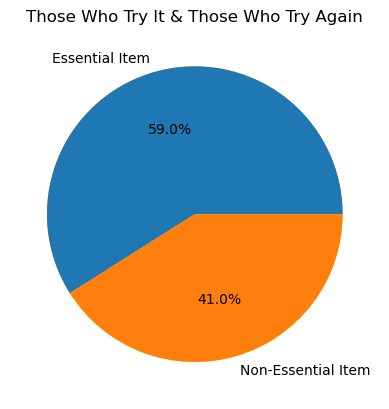

In [43]:
#creating pie chart to demonstrate relationship between reorders vs no reorders
essentialpie=plt.pie(per_essentials, colors=['orange','yellow'])
plt.title('Those Who Try It & Those Who Try Again')
plt.pie(per_essentials,labels=label,autopct='%1.1f%%')


Customers are more likely to reorder an item on instacart after ordering it once, this demonstrates the essential role instacart can play in a customer's day to day

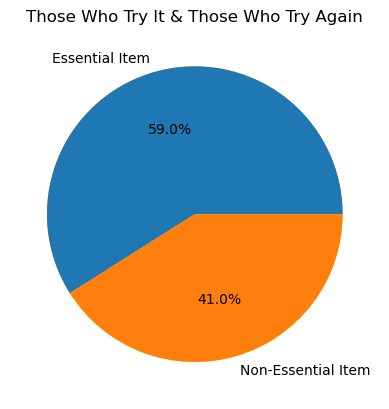

In [52]:
#saving pie
essentialpie=plt.pie(per_essentials, colors=['orange','yellow'])
plt.title('Those Who Try It & Those Who Try Again')
plt.pie(per_essentials,labels=label,autopct='%1.1f%%')
plt.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Analysis 04\Visualizations\essentials_pie.png'))

## creating department id flag

In [53]:
#understanding department column
smallsamp['department_id'].info()

<class 'pandas.core.series.Series'>
Index: 2026905 entries, 1 to 6757144
Series name: department_id
Non-Null Count    Dtype
--------------    -----
2026905 non-null  int64
dtypes: int64(1)
memory usage: 30.9 MB


In [14]:
#defining departments
departmentdict= {
                            1: 'frozen',
                            2: 'other',
                            3: 'bakery',
                            4: 'produce',
                            5: 'alcohol',
                            6: 'international',
                            7: 'beverages',
                            8: 'pets',
                            9: 'dry goods pasta',
                            10: 'bulk',
                            11: 'personal care',
                            12: 'meat seafood',
                            13: 'pantry',
                            14: 'breakfast',
                            15: 'canned goods',
                            16: 'dairy eggs',
                            17: 'household',
                            18: 'babies',
                            19: 'snacks',
                            20: 'deli',
                                                    }

In [15]:
#creating department names column
smallsamp['department_names']=smallsamp['department_id'].map(departmentdict).fillna('NA')

C:\Users\Samth\AppData\Local\Temp\ipykernel_18988\3177055690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smallsamp['department_names']=smallsamp['department_id'].map(departmentdict).fillna('NA')


In [64]:
#viewing columns to ensure new column exists
smallsamp.columns

Index(['user_id', 'product_name', 'loyalty_flag', 'Region', 'fam_status',
       'Gender', 'Age', 'Children', 'order_hour_of_day', 'price_range_loc',
       'department_id', 'reordered', 'max_order', 'max_children', 'essentials',
       'department_names'],
      dtype='object')

In [65]:
#vieiwng output of department column
smallsamp['department_names'].value_counts(dropna=False)

department_names
produce            592348
dairy eggs         337574
snacks             180350
beverages          168997
frozen             138573
pantry             117023
bakery              74136
canned goods        67094
deli                66183
dry goods pasta     54209
household           45827
meat seafood        44566
breakfast           44166
personal care       28411
babies              25998
international       16900
alcohol              9730
pets                 5793
NA                   4391
other                2354
bulk                 2283
Name: count, dtype: int64

## viewing departments different customer types shop at

In [66]:
#reviewing the different types of customers
smallsamp['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    1002462
Loyal customer       636599
New customer         387844
NaN                       1
Name: count, dtype: int64

In [83]:
#grouping by departments and loyalty flag
department_customers=smallsamp.groupby(['department_names','loyalty_flag']).size().unstack()

In [84]:
#viewing output
department_customers.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_names,,,
NA,1106,1078,2206
alcohol,2671,2223,4836
babies,9891,3930,12177
bakery,24286,13954,35896
beverages,52530,32169,84298


In [85]:
#sorting results
department_customers=department_customers.sort_values(by='Loyal customer',ascending=False)

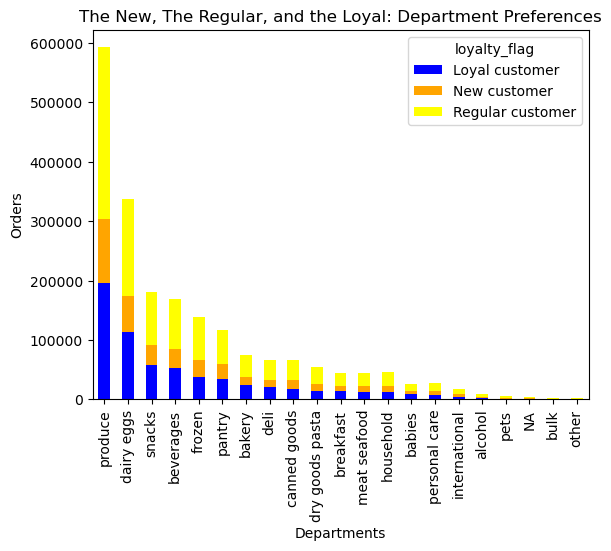

In [89]:
#creating and saving bar chart to view departments and loyalty flags
department_customer_bar=department_customers.plot(kind='bar',stacked= True, color=['blue','orange','yellow'])
plt.xlabel('Departments')
plt.ylabel('Orders')
plt.title ('The New, The Regular, and the Loyal: Department Preferences')
plt.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Analysis 04\Visualizations\stacked_customer_dept.png'))

All customer types use Instacart to order grocery items, produce and dairy ranking the highest in order amounts. This information, along with the information of most popular order hour of day could help the marketing team create promotions during peak hours to encourage more purchases, such as a happy hour promotion on Sundays where from 6 am to 9 am customers receive 20% off on on produce (oranges, etc) if paired with an item from the alcohol or breakfast department which will encourage department sales across the board.

## continuing step 5 and 6

I will examine my profile looking at different variables in the profile variables to compare their relationships with one another and examine the impacts of the different items

In [90]:
#creating font, code found online
font2 = {'family':'serif','color':'darkred','size':15}

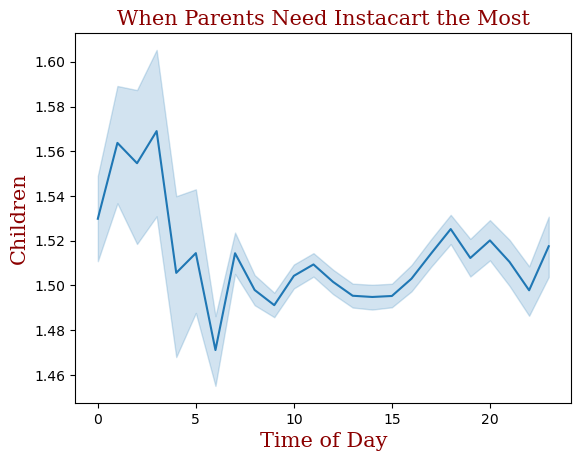

In [92]:
#determining the relationship between Family Status and Order Hour
famline=sns.lineplot(x='order_hour_of_day',y='Children',data=smallsamp)
plt.xlabel('Time of Day', fontdict= font2)
plt.ylabel('Children', fontdict=font2)
plt.title ('When Parents Need Instacart the Most', fontdict=font2)
plt.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Analysis 04\Visualizations\parents_need_line.png'))

As the amount of children in the home increase, customers are more likely to make orders in the late night to early morning, this may be due to young parents or families with many children having to deal with late night/early morning wake ups and emergencies

## Step 7 

In [20]:
#agg a customer profile for usage frequency and expenditure
agg_customer_profile=smallsamp.groupby('user_id').agg({'Children':['max','mean','min'],
                                                      'max_order':['max','mean','min'],
                                                      'Age':['max','mean','min']}).reset_index()

In [109]:
#viewing columns of profile
agg_customer_profile.columns

MultiIndex([(  'user_id',     ''),
            ( 'Children',  'max'),
            ( 'Children', 'mean'),
            ( 'Children',  'min'),
            ('max_order',  'max'),
            ('max_order', 'mean'),
            ('max_order',  'min'),
            (      'Age',  'max'),
            (      'Age', 'mean'),
            (      'Age',  'min')],
           )

In [111]:
#renaming columns of profile
agg_customer_profile.columns=['user_id','max_children','avg_children','min_children','max_order','avg_order','min_order','max_age','avg_age','min_age']

In [112]:
#viewing new column names
agg_customer_profile.columns

Index(['user_id', 'max_children', 'avg_children', 'min_children', 'max_order',
       'avg_order', 'min_order', 'max_age', 'avg_age', 'min_age'],
      dtype='object')

In [113]:
#vieiwng output
agg_customer_profile.head(2)

,user_id,max_children,avg_children,min_children,max_order,avg_order,min_order,max_age,avg_age,min_age
0,2.0,3.0,3.0,3.0,14.0,14.0,14.0,68.0,68.0,68.0
1,12.0,0.0,0.0,0.0,5.0,5.0,5.0,46.0,46.0,46.0


## step 8 and 9 customer profiles, regions and possible links

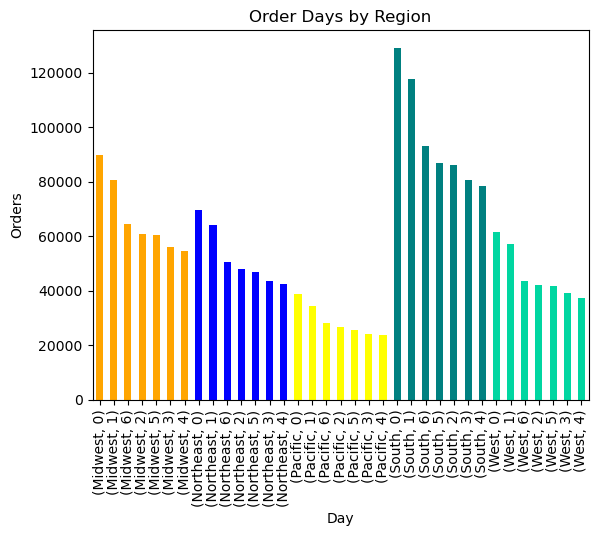

In [48]:
#comparing regions and order day of week
regionday = smallsamp.groupby('Region')['order_dow'].value_counts().plot.bar(title = 'Order Days by Region', xlabel = 'Day', ylabel = 'Orders',color=['orange']* 7 + ['blue'] * 7 + ['yellow'] * 7 + ['teal'] * 7 + ['#00d6a1'] * 7)
plt.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Analysis 04\Visualizations\region_days_bar.png'))


Across the board, all regions send out the most orders on Saturdays and Sundays, and the least on Tuesdays and Wednesdays respectively.

In [16]:
#comparing regions and loyalty types
region_customers=smallsamp.groupby(['Region','loyalty_flag']).size().unstack()

In [17]:
#sorting 
region_customers=region_customers.sort_values(by='Loyal customer', ascending=False)

In [23]:
#viewing output
region_customers.head()

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
South,205288,129647,336957
Midwest,142000,91138,233257
Northeast,120272,68389,176048
West,103740,59978,158973
Pacific,65299,38692,97227


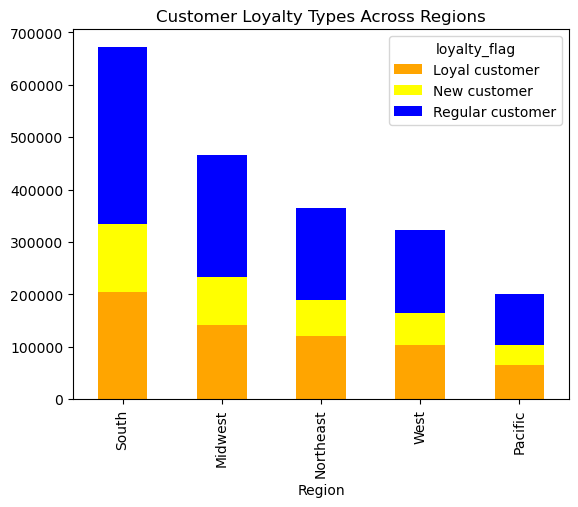

In [18]:
#creating stacked bar
region_customers=region_customers.plot(kind='bar',stacked=True,color=['orange','yellow','blue'])
plt.title('Customer Loyalty Types Across Regions')
plt.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Analysis 04\Visualizations\region_loyal.png'))

Based on the chart, when comparing regions with similarly sized populations such as the Northeast and the West regions, regular customers will account for about 60% of the customer population in an area. This information can help the marketing team create a push for promotions aimed at converting regular customers to loyal customers.

In [25]:
#comparing region and department
department_region=smallsamp.groupby(['department_names','Region']).size().unstack()

In [26]:
#sorting values
department_region=department_region.sort_values(by='South',ascending=False)

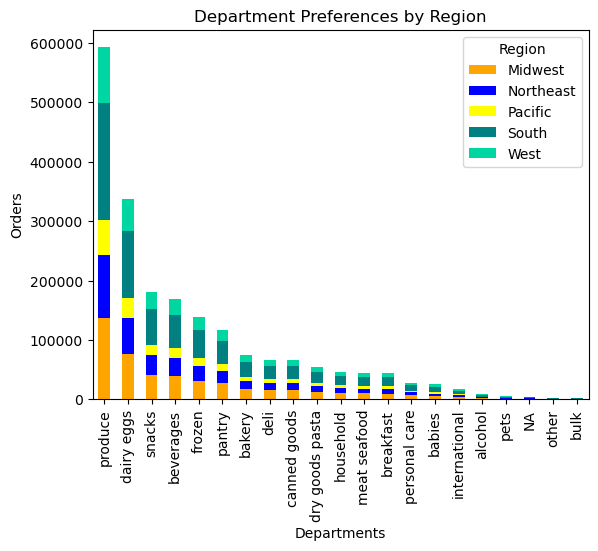

In [28]:
#creating bar
colors=['orange','blue','yellow','teal','#00d6a1']
deptbar=department_region.plot(kind='bar',stacked=True, color=colors)
plt.title('Department Preferences by Region')
plt.xlabel('Departments')
plt.ylabel('Orders')
plt.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Analysis 04\Visualizations\department_region_bar.png'))

Due to the disporportionate amount of customers in the south compared to other regions, we're unable to make an accurate link between the difference in department habits as one region has more data available compared to others.

# 6 Exporting Final Set

In [29]:
#exporting final sample set
smallsamp=smallsamp.to_pickle(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\01-Instacart Basket Analysis\Data 02\Manipulated Data\projset_small_profile_more_variables.pkl'))